In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


<AxesSubplot:xlabel='rating', ylabel='count'>

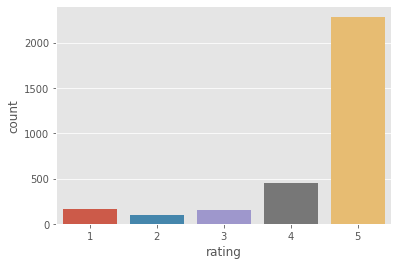

In [4]:
sns.countplot(x='rating', data=df)

In [5]:
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

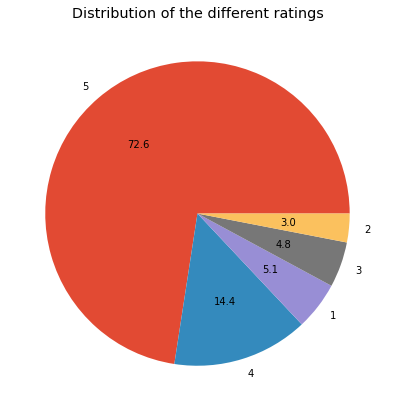

In [6]:
fig = plt.figure(figsize=(7,7))
tags = df['rating'].value_counts()
tags.plot(kind='pie', autopct='%1.1f', label='')
plt.title('Distribution of the different ratings')
plt.show()

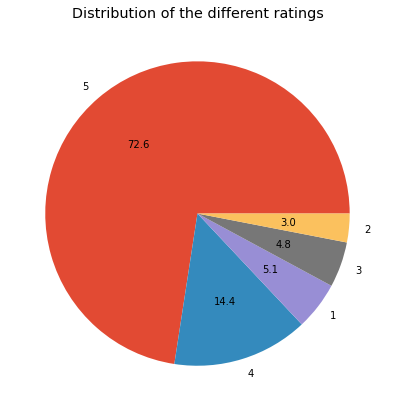

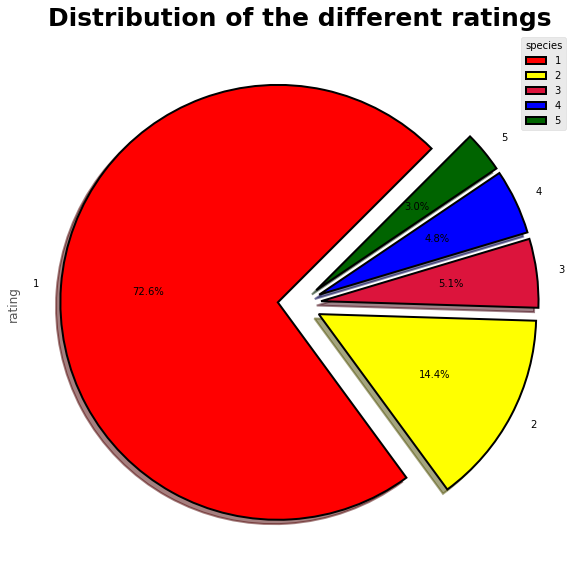

In [12]:
fig = plt.figure(figsize=(7,7))
tags = df['rating'].value_counts()
tags.plot(kind='pie', autopct='%1.1f', label='')
plt.title('Distribution of the different ratings')
plt.show()

fig = plt.figure(figsize=(10,10))
colors = ("red", "yellow", "crimson", "blue", "darkgreen") 
wp = {'linewidth':2, 'edgecolor':"black"} 
data = df['rating'].value_counts()
explode = (0.1,0.1,0.1, 0.1,0.1)
classes = ['1','2','3','4','5']
data.plot(kind='pie', autopct='%0.1f%%',labels=classes, startangle = 45, colors = colors,
         explode = explode, shadow=True, wedgeprops = wp)
plt.legend(title="species")
plt.title("Distribution of the different ratings", loc='center', color='black', fontsize='25', fontweight='bold')
plt.show()

<AxesSubplot:xlabel='count', ylabel='variation'>

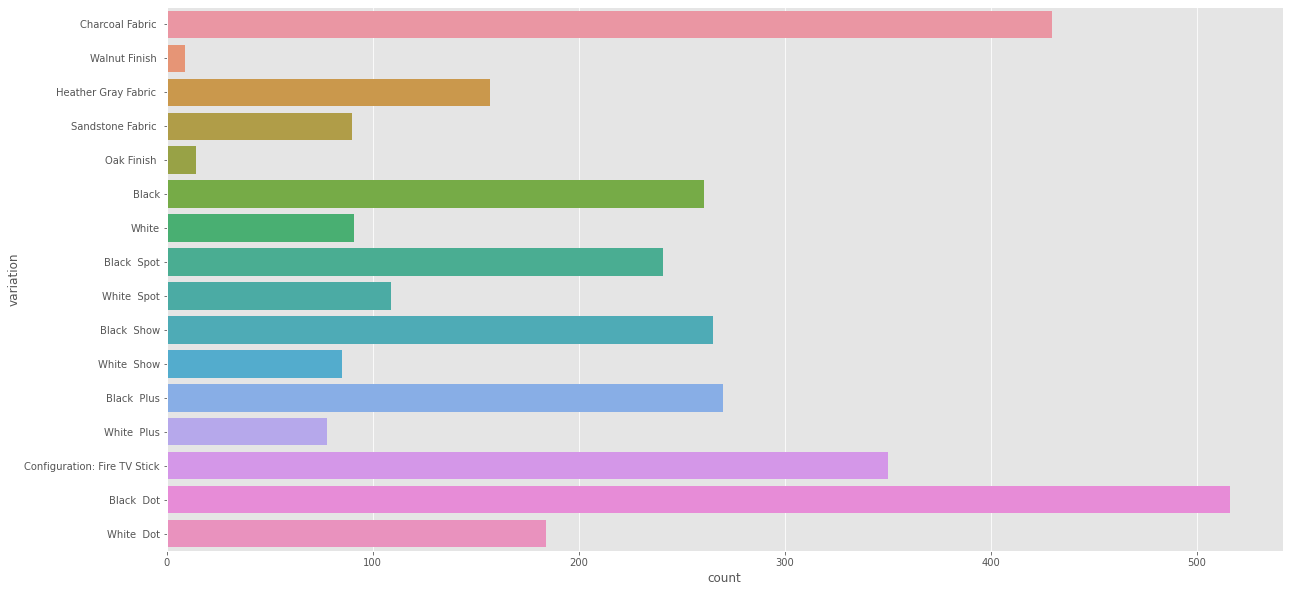

In [7]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y='variation', data=df)

In [8]:
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

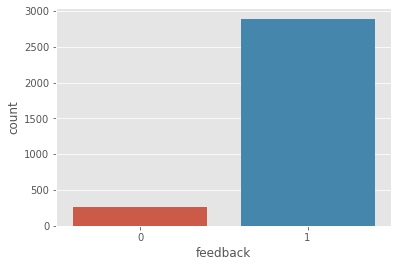

In [9]:
sns.countplot(x='feedback', data=df)
plt.show()

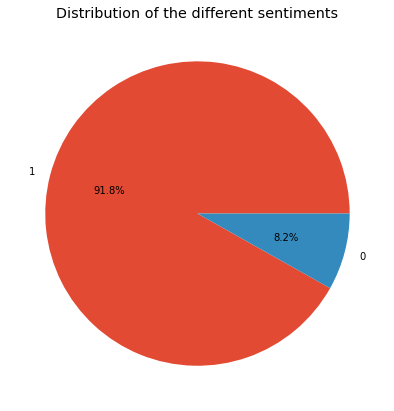

In [10]:
fig = plt.figure(figsize=(7,7))
tags = df['feedback'].value_counts()
tags.plot(kind='pie', autopct="%1.1f%%", label='')
plt.title("Distribution of the different sentiments")
plt.show()

In [11]:
for i in range(5):
    print(df['verified_reviews'].iloc[i], "\n")
    print(df['feedback'].iloc[i], "\n")

Love my Echo! 

1 

Loved it! 

1 

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. 

1 

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. 

1 

Music 

1 



In [12]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'[^\w\s]','', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [13]:
df.verified_reviews = df['verified_reviews'].apply(data_processing)

In [14]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [15]:
df['verified_reviews'] = df['verified_reviews'].apply(lambda x: stemming(x))

In [16]:
for i in range(5):
    print(df['verified_reviews'].iloc[i], "\n")
    print(df['feedback'].iloc[i], "\n")

love echo 

1 

loved 

1 

sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home 

1 

lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well 

1 

music 

1 



In [17]:
pos_reviews= df[df.feedback==1]
pos_reviews.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love echo,1
1,5,31-Jul-18,Charcoal Fabric,loved,1
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1
3,5,31-Jul-18,Charcoal Fabric,lot fun thing 4 yr old learns dinosaurs contro...,1
4,5,31-Jul-18,Charcoal Fabric,music,1


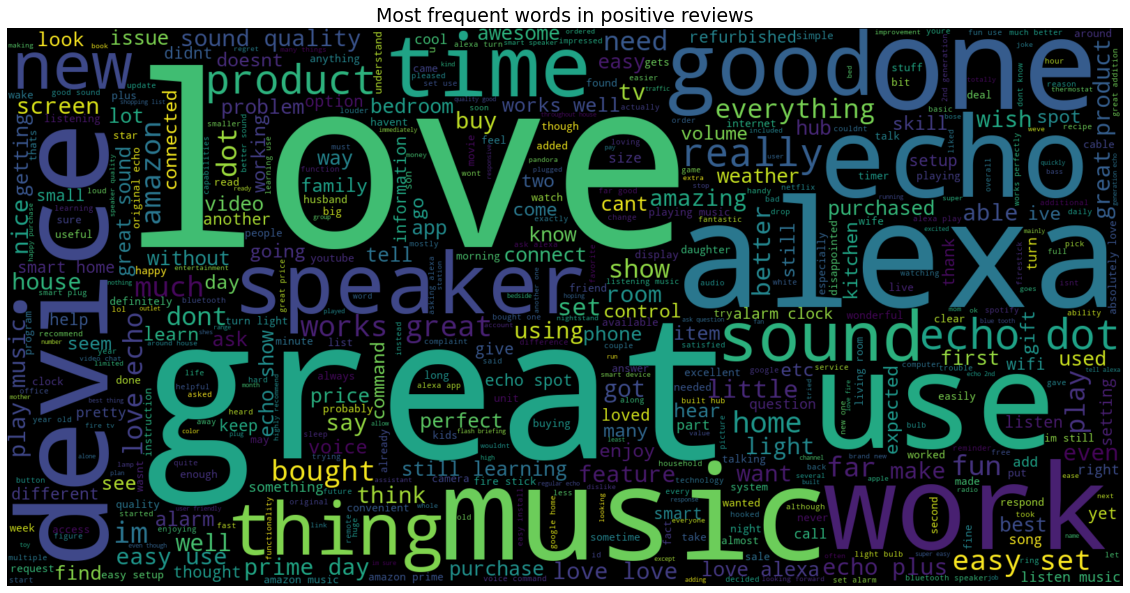

In [18]:
text = ' '.join([word for word in pos_reviews['verified_reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize=19)
plt.show()

In [19]:
neg_reviews= df[df.feedback==0]
neg_reviews.head()

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,like siri fact siri answers accurately alexa d...,0
111,2,30-Jul-18,Charcoal Fabric,sound terrible u want good music get bose,0
141,1,30-Jul-18,Charcoal Fabric,much features,0
162,1,30-Jul-18,Sandstone Fabric,stopped working 2 weeks didnt follow commands ...,0
176,2,30-Jul-18,Heather Gray Fabric,sad joke worthless,0


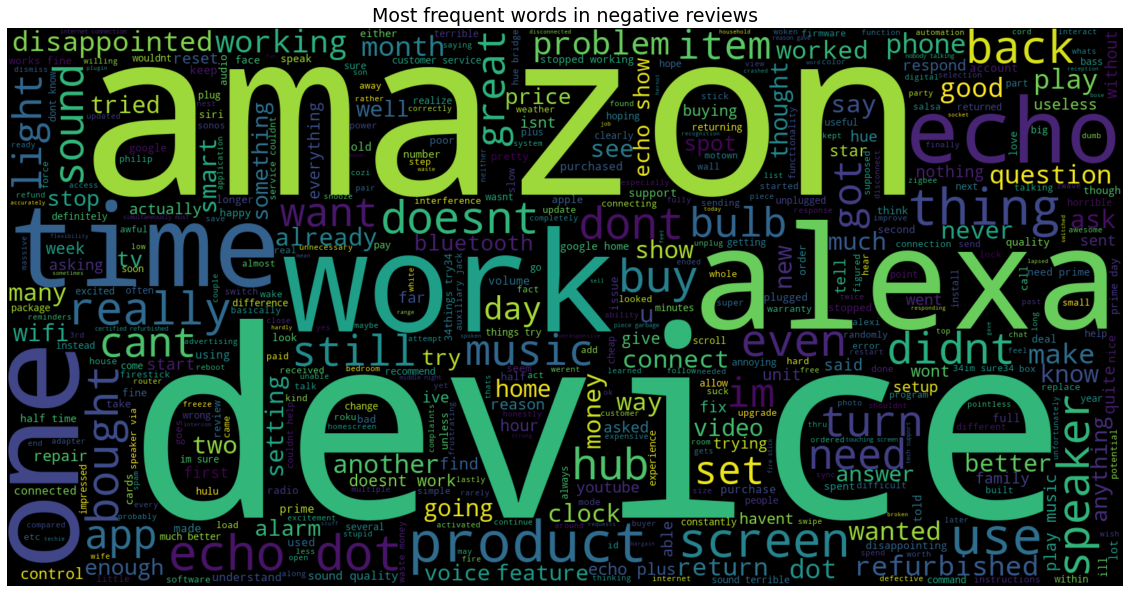

In [20]:
text = ' '.join([word for word in neg_reviews['verified_reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative reviews', fontsize=19)
plt.show()

In [21]:
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [22]:
tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(df['verified_reviews'])
X = tokenizer.texts_to_sequences(df['verified_reviews'])
X = pad_sequences(X)
X

array([[  0,   0,   0, ...,   0,   1,   2],
       [  0,   0,   0, ...,   0,   0, 175],
       [  0,   0,   0, ...,  71, 260,  21],
       ...,
       [  0,   0,   0, ...,  86,  45,  28],
       [  0,   0,   0, ..., 111, 122, 107],
       [  0,   0,   0, ...,   0,   0,  14]])

In [24]:
X.shape

(3150, 145)

In [26]:
Y = df['feedback']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (2520, 145)
Size of y_train:  (2520,)
Size of x_test:  (630, 145)
Size of y_test:  (630,)


In [30]:
model = Sequential()
model.add(Embedding(500, 120, input_length= X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 145, 120)          60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 145, 120)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                47360     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 107,425
Trainable params: 107,425
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
79/79 [==============================] - 8s 78ms/step - loss: 0.3277 - accuracy: 0.9131
Epoch 2/10
79/79 [==============================] - 6s 79ms/step - loss: 0.2364 - accuracy: 0.9222
Epoch 3/10
79/79 [==============================] - 7s 83ms/step - loss: 0.1592 - accuracy: 0.9409
Epoch 4/10
79/79 [==============================] - 6s 80ms/step - loss: 0.1201 - accuracy: 0.9540
Epoch 5/10
79/79 [==============================] - 6s 80ms/step - loss: 0.1073 - accuracy: 0.9611
Epoch 6/10
79/79 [==============================] - 6s 78ms/step - loss: 0.0895 - accuracy: 0.9643
Epoch 7/10
79/79 [==============================] - 6s 78ms/step - loss: 0.0780 - accuracy: 0.9710
Epoch 8/10
79/79 [==============================] - 6s 82ms/step - loss: 0.0688 - accuracy: 0.9734
Epoch 9/10
79/79 [==============================] - 6s 80ms/step - loss: 0.0616 - accuracy: 0.9754
Epoch 10/10
79/79 [==============================] - 7s 83ms/step - loss: 0.0566 - accuracy: 0.9770


In [32]:
Scores = model.evaluate(x_test, y_test)
print("Accuracy = %0.3f%%"%(Scores[1]*100))

20/20 [==============================] - 1s 26ms/step - loss: 0.2767 - accuracy: 0.9254
Accuracy = 92.540%


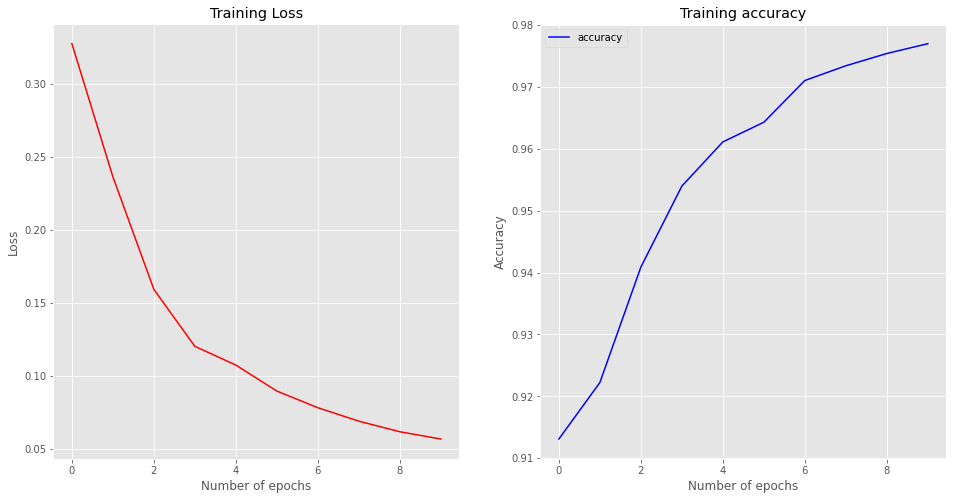

In [33]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Model configuration 2 

In [34]:
model = Sequential()
model.add(Embedding(500, 120, input_length= X.shape[1]))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 145, 120)          60000     
                                                                 
 lstm_1 (LSTM)               (None, 32)                19584     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 79,617
Trainable params: 79,617
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
79/79 [==============================] - 7s 65ms/step - loss: 0.3373 - accuracy: 0.9143
Epoch 2/10
79/79 [==============================] - 5s 63ms/step - loss: 0.2368 - accuracy: 0.9218
Epoch 3/10
79/79 [==============================] - 5s 63ms/step - loss: 0.1654 - accuracy: 0.9373
Epoch 4/10
79/79 [==============================] - 5s 66ms/step - loss: 0.1209 - accuracy: 0.9536
Epoch 5/10
79/79 [==============================] - 5s 62ms/step - loss: 0.0978 - accuracy: 0.9635
Epoch 6/10
79/79 [==============================] - 5s 63ms/step - loss: 0.0814 - accuracy: 0.9710
Epoch 7/10
79/79 [==============================] - 5s 66ms/step - loss: 0.0703 - accuracy: 0.9774
Epoch 8/10
79/79 [==============================] - 5s 64ms/step - loss: 0.0615 - accuracy: 0.9782
Epoch 9/10
79/79 [==============================] - 5s 62ms/step - loss: 0.0520 - accuracy: 0.9810
Epoch 10/10
79/79 [==============================] - 5s 65ms/step - loss: 0.0457 - accuracy: 0.9837


In [36]:
Scores = model.evaluate(x_test, y_test)
print("Accuracy = %0.3f%%"%(Scores[1]*100))

20/20 [==============================] - 1s 12ms/step - loss: 0.2488 - accuracy: 0.9286
Accuracy = 92.857%


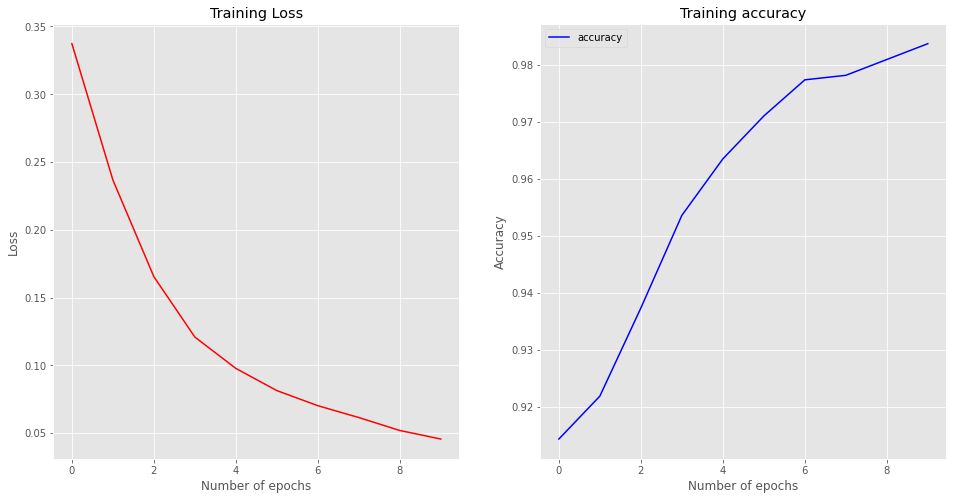

In [37]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()